# [Машинное обучение на ФБМФ](https://thetahat.ru/courses/bm-2025-spr)
## Домашнее задание 4

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  20 баллов
* Задача 2 &mdash;  40 баллов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  60 баллов
-----

In [1]:
# Bot check

# HW_ID: bt_ml_hw4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# возможно придется что-то добавить)

## <b><font color="blue">Легкая часть</font></b>

## Задача 1

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте и поясните свой ответ на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно с признаком $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

Как было рассказано на лекции - решающие деревья хороши тем, что нам не надо преобразовывать данные как влинейных моделях. Так же по пунктам отмечу:
- Нет. Нам важны пороговые значения, а от монотонной функции порядок признаков в датасете не изменится
- Иногда возможно. Например функция $x^2$ полезна, если нам не важен знак признака
- Нет. Это бесполезно, так как это будет просто линейная комбинация, а деревья и так способны работать с признаками независимо
- Иногда возможно. Так мы сможем например посмотреть на зависимость произведения признаков например, что-то поможет лучше разделить
- Нет. У нас нет зависимости от масштаба, так что бесполезно.
- Да. Категориальные признаки только на первый взгляд подходят для работы решающего дерева, на самом деле надо пердставить в численный вид для построения критерия.

## Задача 2

### 1. Загрузка и предобработка данных.

В этом [наборе данных](https://www.kaggle.com/datasets/arezaei81/heartcsv) содержится различная информация о пациентах, включая возраст, пол, артериальное давление, уровень холестерина, электрокардиографические характеристики (ЭКГ) и многое другое. Целевой характеристикой является `target` - наличие у пациента сердечного заболевания.

Информация о наборе данных:

1. **age**: Возраст пациента.
2. **sex**: Пол пациента (0: женский, 1: мужской).
3. **cp**: Тип боли в груди.
4. **trestbps**: Артериальное давление в состоянии покоя.
5. **chol**: уровень холестерина в сыворотке крови.
6. **fbs**: Быстрый сахар крови > 120 мг/дл.
7. **restecg**: Результаты электрокардиографии в состоянии покоя.
8. **thalach**: Максимальная достигнутая частота сердечных сокращений.
9. **exang**: Стенокардия, вызванная физической нагрузкой.
10. **oldpeak**: Депрессия ST, вызванная физической нагрузкой по сравнению с покоем.

In [10]:
heart = pd.read_csv('heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 2. Обучение модели


Создайте массив признаков и массив таргета.

In [14]:
X = heart.drop(['target'], axis = 1)
y = heart['target']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Обучите модель решающего дерева.

In [19]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Сделайте предсказание для тестовой выборки.

In [22]:
predictions = clf.predict(X_test)

Создайте массив, показывающий успех или не успех модели (1 если модель угадала класс, 0 если не угадала).

In [25]:
success_array = np.where(predictions == y_test, 1, 0)
success_array

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1])

Вы получили выборку из распределения $Bern(\theta)$. Постройте доверительный интервал для $\theta$.

In [28]:
confidence_level = 0.95
alpha = 1 - confidence_level

ci_lower = np.mean(success_array) - sps.norm.ppf(1 - alpha / 2) * np.sqrt(np.mean(success_array) * (1 - np.mean(success_array)) / len(success_array))
ci_upper = np.mean(success_array) + sps.norm.ppf(1 - alpha / 2) * np.sqrt(np.mean(success_array) * (1 - np.mean(success_array)) / len(success_array))

print(f"Оценка theta: {np.mean(success_array):.4f}")
print(f"Доверительный интервал (уровень доверия 0,95): [{ci_lower:.4f}, {ci_upper:.4f}]")

Оценка theta: 0.7363
Доверительный интервал (уровень доверия 0,95): [0.6457, 0.8268]


Повторите все шаги для случайного леса. Сравните полученные интервалы.

In [31]:
random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
predictions_random_forest = random_forest.predict(X_test)

In [35]:
success_array_rf = np.where(predictions_random_forest == y_test, 1, 0)
success_array_rf

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1])

In [39]:
confidence_level = 0.95
alpha = 1 - confidence_level

ci_lower = np.mean(success_array_rf) - sps.norm.ppf(1 - alpha / 2) * np.sqrt(np.mean(success_array_rf) * (1 - np.mean(success_array_rf)) / len(success_array_rf))
ci_upper = np.mean(success_array_rf) + sps.norm.ppf(1 - alpha / 2) * np.sqrt(np.mean(success_array_rf) * (1 - np.mean(success_array_rf)) / len(success_array_rf))

print(f"Оценка theta для случайного леса: {np.mean(success_array_rf):.4f}")
print(f"Доверительный интервал для случайного леса (уровень доверия 0,95): [{ci_lower:.4f}, {ci_upper:.4f}]")

Оценка theta для случайного леса: 0.8242
Доверительный интервал для случайного леса (уровень доверия 0,95): [0.7460, 0.9024]


**Выводы:**

Видим, что для случайного леса  результаты получились лучше - наша оценка увеличилась, а интервал сдвинулся вверх по числовой прямой. Увеличение среднего (оценки) в данном случае говорит об учащении 'успехов' нашей модели

## <b><font color="orange">Сложная часть</font></b>
## Задача 3
### 1. Загрузка данных

[Данные](https://archive.ics.uci.edu/dataset/1/abalone). Будем предсказывать возраст моллюсков.



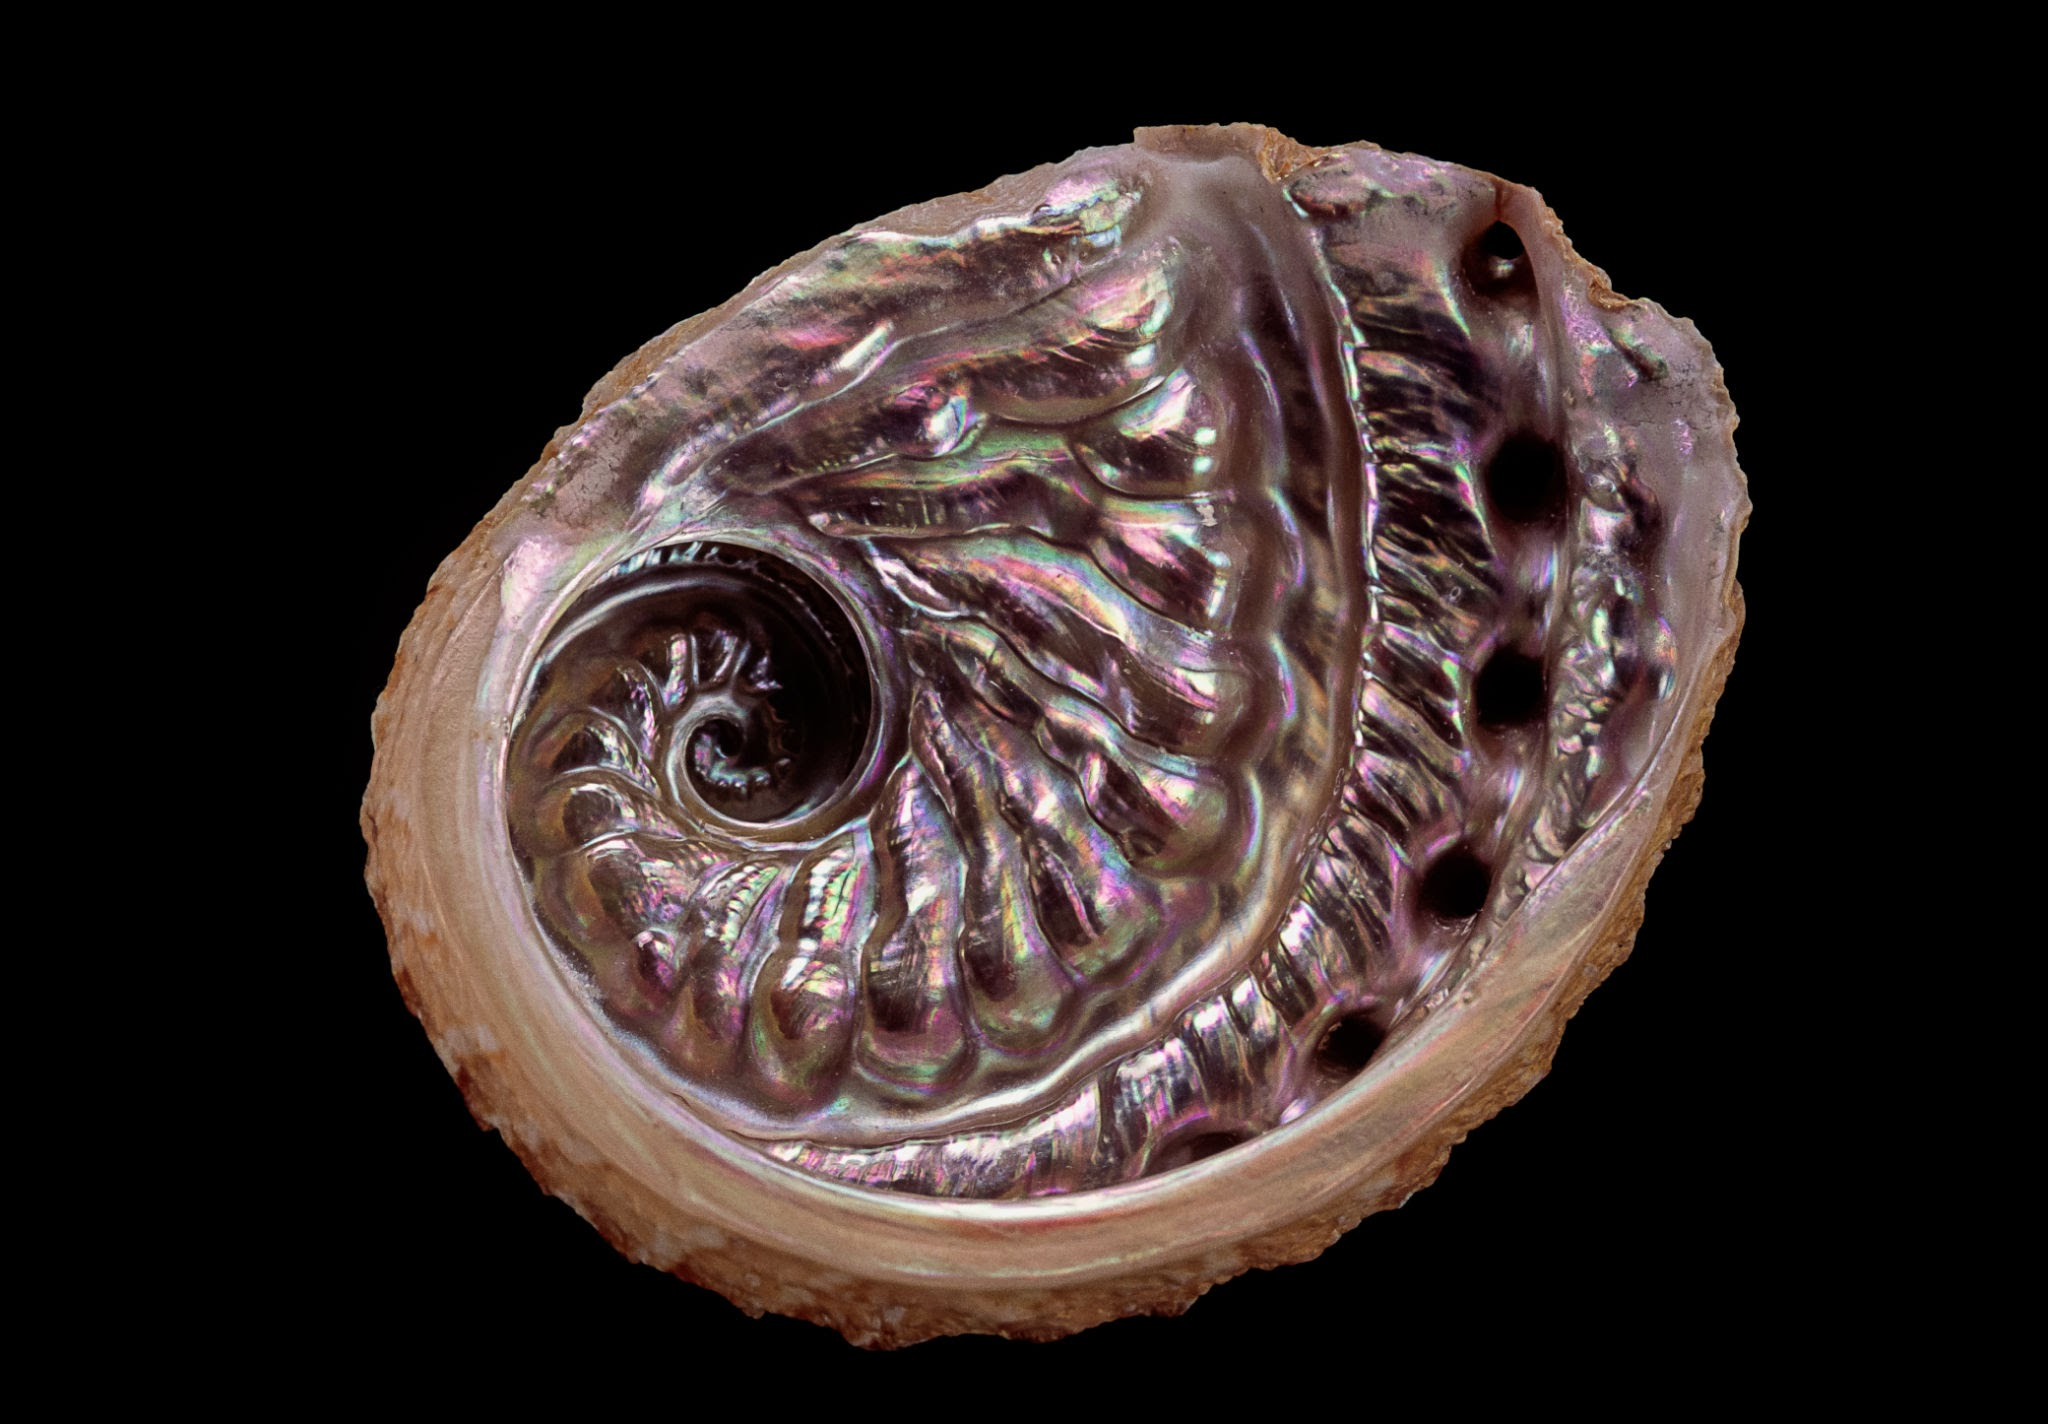

In [4]:
data = pd.read_csv('abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                                          'Shucked weight', 'Viscera weight', 'Shell weight',
                                          'Rings'])

In [5]:
data = data.drop('Sex', axis=1)
X = data.drop('Rings', axis=1)
y = data['Rings'] + 1.5

In [6]:
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, test_size = 0.2, random_state=42)

### 2. Обучение модели

Обучите решающее дерево глубины 3 и визуализируйте его.

*Рекомендуется сделать скриншот визуализации и прислать его в бот вместе с ноутбуком.*

In [7]:
dtr = DecisionTreeRegressor(random_state=42, max_depth = 3)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

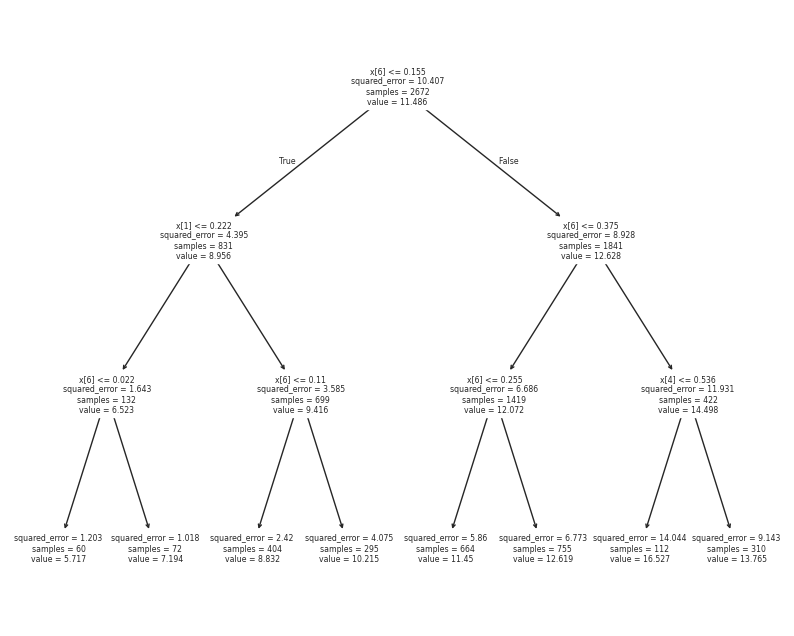

In [8]:
plt.figure(figsize=(10, 8))
tree.plot_tree(dtr)
plt.show()

Посчитайте выбранную метрику на валидационной выборке.

In [9]:
# какую метрику?
y_pred = dtr.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)
print(f"Средняя абсолютная ошибка (MAE): {mae:.4f}")

Средняя абсолютная ошибка (MAE): 1.7827


In [10]:
mse = mean_squared_error(y_valid, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")

Среднеквадратичная ошибка (MSE): 5.7489


In [11]:
r2 = r2_score(y_valid, y_pred)
print(f"Коэффициент детерминации (R^2): {r2:.4f}")

Коэффициент детерминации (R^2): 0.4108


Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график - зависиость ошибки от максимальной глубины дерева. Подробнее про гиперпараметры смотрите в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

In [12]:
depths = np.arange(1, 31)
maes = []
for depth in depths:
    dtr = DecisionTreeRegressor(random_state=42, max_depth = depth)
    dtr.fit(X_train, y_train)
    y_pred = dtr.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pred)
    maes.append(mae)

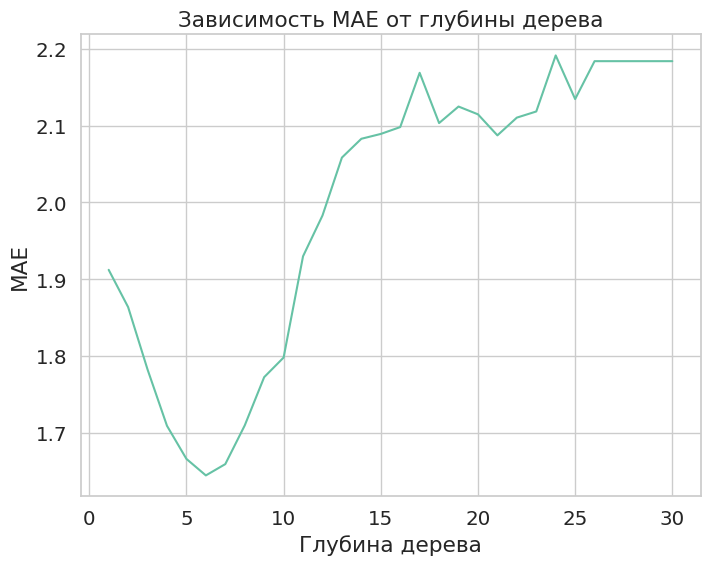

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(depths, maes)
plt.title('Зависимость MAE от глубины дерева')
plt.xlabel('Глубина дерева')
plt.ylabel('MAE')
plt.show()

In [14]:
# минимум при глубине дерева = 6
dtr = DecisionTreeRegressor(random_state=42, max_depth = 6)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)
print(f"Средняя абсолютная ошибка (MAE): {mae:.4f}")

Средняя абсолютная ошибка (MAE): 1.6448


Аналогичным образом подберите минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться, зафиксировав при этом подобранное значение максимальной глубины. Для минимального числа объектов в листе и максимального число признаков, по которым ищется лучшее разбиение в дереве, подберите аналогично, фиксируя лучшие значения гиперпараметров, подобранные на предыдущем шаге.

In [15]:
optimal_max_depth = 6
# сначала разберёмся с минимальным числом объектов, при optimal_max_depth = 6
min_objects = np.arange(2, 101)
maes = []

for min_obj in min_objects:
    dtr = DecisionTreeRegressor(random_state = 42, max_depth = optimal_max_depth, min_samples_split = min_obj)
    dtr.fit(X_train, y_train)
    y_pred = dtr.predict(X_valid)
    maes.append(mean_absolute_error(y_valid, y_pred))

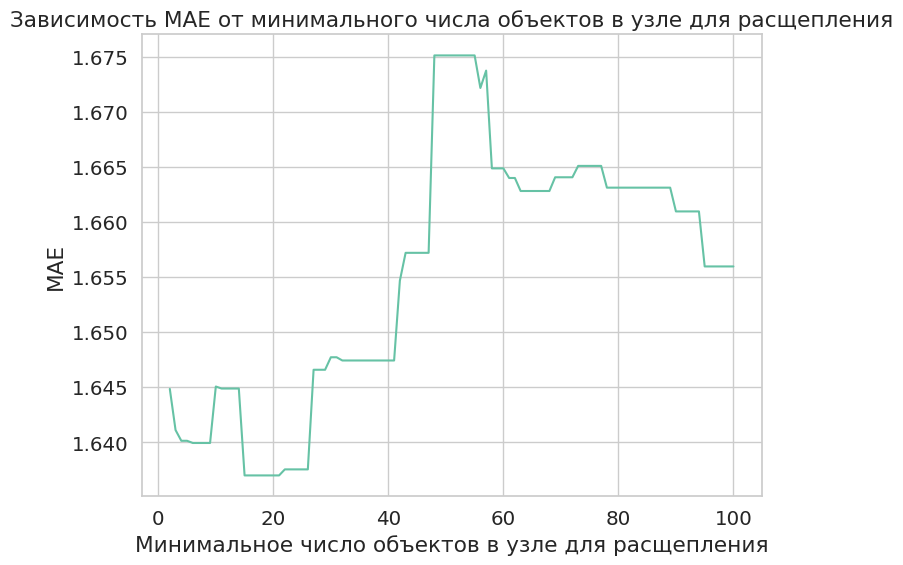

Оптимальное значение min_samples_split: 15


In [16]:
plt.figure(figsize=(8, 6))
plt.plot(min_objects, maes)
plt.title('Зависимость MAE от минимального числа объектов в узле для расщепления')
plt.xlabel('Минимальное число объектов в узле для расщепления')
plt.ylabel('MAE')
plt.show()

optimal_min_samples_split = min_objects[np.argmin(maes)]
print(f"Оптимальное значение min_samples_split: {optimal_min_samples_split}")

In [17]:
# теперь разберёмся с минимальным числом объектов в листе
min_samples_leaves = np.arange(1, 31)
maes = []

for min_leaf in min_samples_leaves:
    dtr = DecisionTreeRegressor(random_state = 42, max_depth = optimal_max_depth, min_samples_split = optimal_min_samples_split, min_samples_leaf = min_leaf)
    dtr.fit(X_train, y_train)
    y_pred = dtr.predict(X_valid)
    maes.append(mean_absolute_error(y_valid, y_pred))

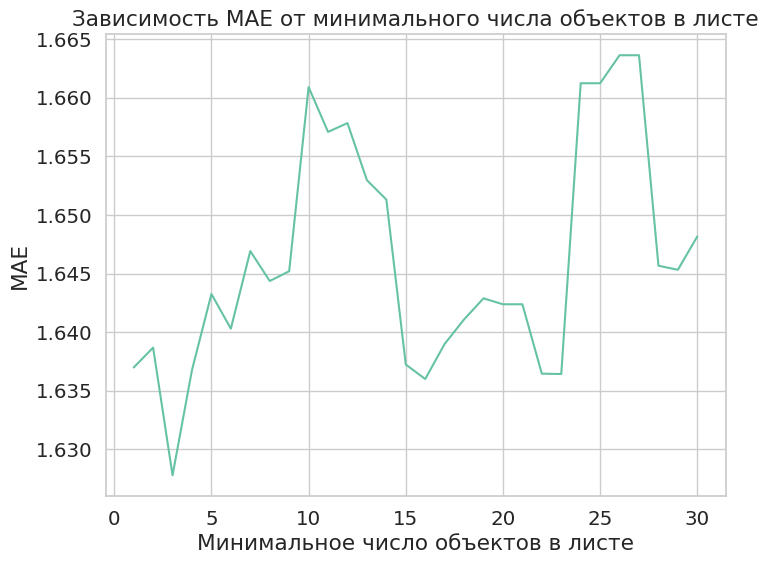

Оптимальное значение min_samples_leaves: 3


In [18]:
plt.figure(figsize=(8, 6))
plt.plot(min_samples_leaves, maes)
plt.title('Зависимость MAE от минимального числа объектов в листе')
plt.xlabel('Минимальное число объектов в листе')
plt.ylabel('MAE')
plt.show()

optimal_leaves = min_samples_leaves[np.argmin(maes)]
print(f"Оптимальное значение min_samples_leaves: {optimal_leaves}")

In [19]:
# и в конце разберёмся с максимальным числом признаков
max_features = np.arange(1, X_train.shape[1] + 1)
maes = []

for max_feature in max_features:
    dtr = DecisionTreeRegressor(random_state=42, max_depth = optimal_max_depth, min_samples_split=optimal_min_samples_split, min_samples_leaf = optimal_leaves, max_features = max_feature)
    dtr.fit(X_train, y_train)
    y_pred= dtr.predict(X_valid)
    maes.append(mean_absolute_error(y_valid, y_pred))

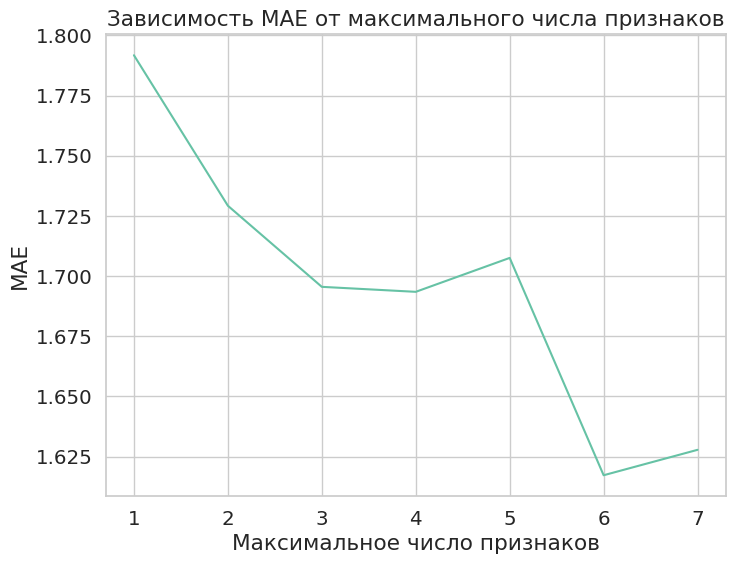

Оптимальное значение max_features: 6


In [20]:
plt.figure(figsize=(8, 6))
plt.plot(max_features, maes)
plt.title('Зависимость MAE от максимального числа признаков')
plt.xlabel('Максимальное число признаков')
plt.ylabel('MAE')
plt.show()

optimal_feature = max_features[np.argmin(maes)]
print(f"Оптимальное значение max_features: {optimal_feature}")

Обучите вашу лучшую модель и сделайте предсказание для тестовой выборки.

In [21]:
# моя лучшая модель
# max_depth = 6
# min_samples_split = 15
# min_samples_leaf = 3
# max_features = 6
dtr = DecisionTreeRegressor(max_depth = optimal_max_depth, min_samples_split=optimal_min_samples_split, min_samples_leaf = optimal_leaves, max_features = optimal_feature)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

Теперь вам предлагается проверить результат своей реализации с уже существующей функцией для оптимизации гиперпараметров - `GridSearchCV`. Эта функция помогает перебирать предопределенные гиперпараметры и подгонять вашу модель к тренировочному набору. Сравните полученные гиперпараметры и если они различаются, объясните почему. Для этого вам может понадобится [документация](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [24]:
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid= {
    'max_depth': np.arange(1, 11),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': np.arange(1, X_train.shape[1] + 1)
},
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1  # Пришлось ускорить
)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Оптимальные гиперпараметры (GridSearchCV):", best_params)

Оптимальные гиперпараметры (GridSearchCV): {'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 10, 'min_samples_split': 2}


Подбор оптимальных параметров прошёл очень похоже на подбор вручную. Но заметно сильное различие в min_samples_split. Возможно, такое произошло из-за выбора среднего оптимального значения во время кросс-валидации в случае GridSearchCV.

Посчитатайте метрику на тестовой выборке и взуализируйте деревья при оптимальных гиперпараметрахдля двух оптимальных моделей - вашей и GridSearchCV.

**Ваша модель**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Средняя абсолютная ошибка (MAE): {mae:.4f}")

Средняя абсолютная ошибка (MAE): 1.7146


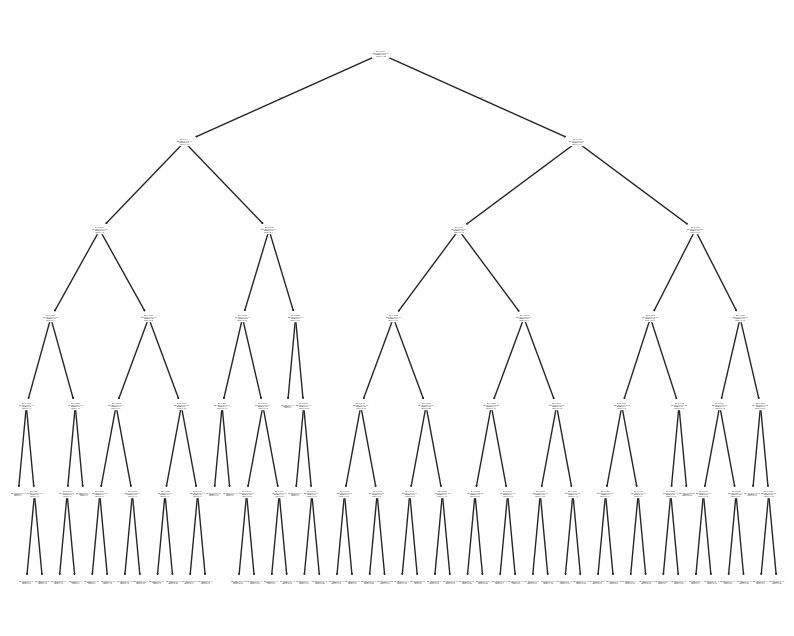

In [ ]:
plt.figure(figsize=(10, 8))
tree.plot_tree(dtr)
plt.show()

**Лучшая модель по мнению GridSearchCV**

In [25]:
# max_depth = 6
# min_samples_split = 2
# min_samples_leaf = 10
# max_features = 6
clf = DecisionTreeRegressor(max_depth = 6, min_samples_split = 2, min_samples_leaf = 10, max_features = 6)
clf.fit(X_train, y_train)

y_pred_CV = clf.predict(X_test)

mae_CV = mean_absolute_error(y_test, y_pred_CV)
print(f"Средняя абсолютная ошибка (MAE): {mae_CV:.4f}")

Средняя абсолютная ошибка (MAE): 1.7504


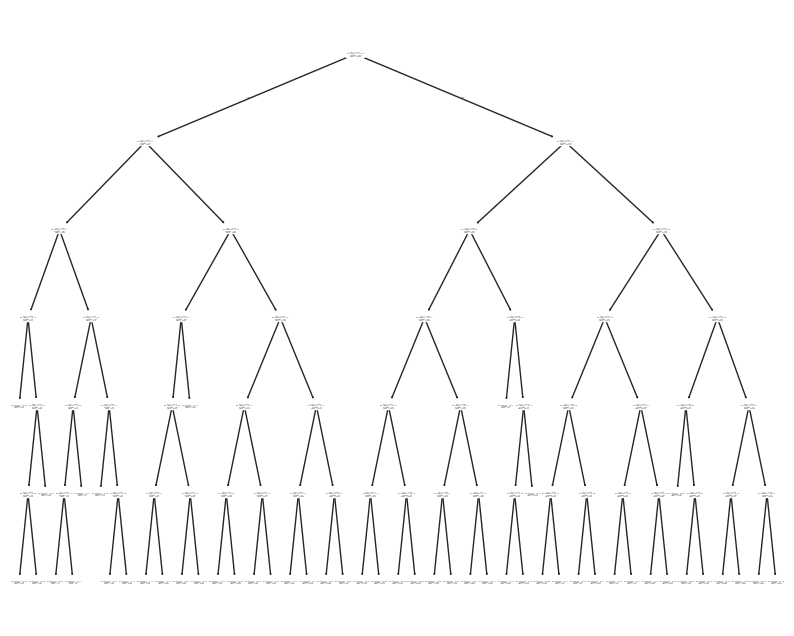

In [26]:
plt.figure(figsize=(10, 8))
tree.plot_tree(clf)
plt.show()

Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа,
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их на одном графике с помощью `seaborn.barplot` для обеих моделей.

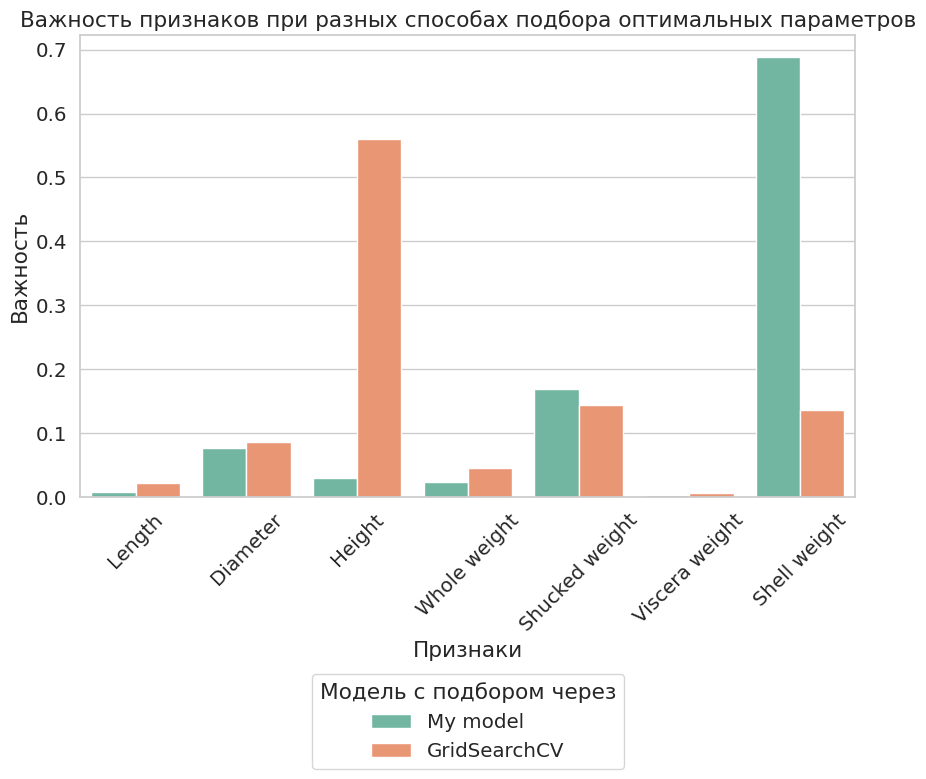

In [38]:
my_importances = dtr.feature_importances_
CV_importances = clf.feature_importances_

feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'My model': my_importances,
    'GridSearchCV': CV_importances
})

importance_df_long = importance_df.melt(
    id_vars='Feature',
    value_vars=['My model', 'GridSearchCV'],
    var_name='Model',
    value_name='Importance'
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df_long,
    x='Feature',
    y='Importance',
    hue='Model'
)
plt.title('Важность признаков при разных способах подбора оптимальных параметров')
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.xticks(rotation=45)
plt.legend(title='Модель с подбором через', loc='lower center', bbox_to_anchor=(0.5, -0.61))
plt.show()

Сделайте выводы. Объясните, согласуется ли логически, почему вес того или иного параметра так влияет на целевую переменную.

**Вывод:** Видно, что моя модель и модель с подбором параметров с GridSearchCV взяли за основной параметр разные признаки. Но оба из этих вариантов логичны - чем старше моллюск, тем дольше он рос и тем выше его раковина, и тем больше она весит.